In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from keras.utils.vis_utils import model_to_dot
from keras.applications import VGG19,ResNet50,InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

print(tf.__version__)

2.4.0


In [ ]:
 #labelNames = ['ssleeve_dresscollarmerge', 'lsleeve_dresscollarmerge', 'nsleeve_dressmerge', 'hood', 'coat', 'jacket', 'lpadding', 'spadding', 'vest', 'cardigan', 'spants', 'lpants', 'skirt']
 #ssleeve_dressmerge,lsleeve_dressmerge,nsleeve_dressmerge,ssleeve_dresscollarmerge,lsleeve_dresscollarmerge
 #'jsuit', 
 # classMatching = [([2, 9], [0], [1, 3, 4, 5, 6, 7, 8, 10], [13, 14], [15], [11, 12])]
#  classDic = { 0:1, 1:2, 2:0, 3:2, 4:2, 5:2, 6:2, 7:2, 8:0, 9:2, 10:3, 11:3, 12:4}
#  classNames = ['nsleeve', 'ssleeve', 'lsleeve', 'pants', 'skirt']

#SiyeonCategory
# labelNames = ['ssleeve','ssleevecollar','hood','coat','jacket','lpadding','spadding','lsleevecollar','cardigan','nsleeve','vest','lpants','spants','dress','jsuit','skirt']
# classDic = { 0:0, 1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:2, 10:2, 11:3, 12:3, 13:4, 14:4, 15:5 }
# classNames = ['ssleeve', 'lsleeve', 'nsleeve', 'pants', 'dress', 'skirt']

labelNames=['lsleeve','hood','coat','jacket','lpadding','spadding','lsleevecollar','cardigan']
classDic ={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7}
classNames = ['lsleeve','hood','coat','jacket','lpadding','spadding','collar','cardigan']

dir = "/content/drive/My Drive/CNNdataset"

In [ ]:
# 전처리 없이 확인

labelNames=['ssleeve','nsleeve','lsleeve','hood','collar']
classDic ={0:0,1:1,2:2,3:3,4:4}
classNames = ['ssleeve','nsleeve','lsleeve','hood','collar']

dir = "/content/drive/My Drive/smallmerge"

In [ ]:
%cd '/content/drive/My Drive/smallmerge'

/content/drive/My Drive/smallmerge


In [ ]:
%cd '/content/drive/My Drive/CNNdataset'
#/imageData.npy

/content/drive/My Drive/CNNdataset


In [ ]:
def sampling(data, per):
    np.random.seed(123)
    N = len(data)
    sample_n = int(len(data)*per)
    sample = data.take(np.random.permutation(N)[:sample_n])
    return sample

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(labelNames):

    label = [0 for i in range(len(classNames))]
    label[classDic[idx]] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    
    i = 0
    lst = []
    for i in range(len(files)) :
        lst.append(i)
    lst = pd.DataFrame(lst, columns = ['idx'])

    trainSet = lst.apply(sampling, per=0.95)
    trainSet = trainSet.sort_index()

    testSet = lst.drop(lst.index[trainSet.index])
    testSet = testSet.sort_index()

    trainSet = trainSet['idx'].values.tolist()
    testSet = testSet['idx'].values.tolist()
    
    for f in range(len(trainSet)):
        img = Image.open(files[trainSet[f]])
        img = img.resize((125,125))
        img = img.convert("RGB")
        data = np.asarray(img)

        if f == 0:
            print(label)
            
        x_train.append(data)
        y_train.append(label)
    
    for f in range(len(testSet)):
        img = Image.open(files[testSet[f]])
        img = img.resize((125,125))
        img = img.convert("RGB")
        data = np.asarray(img)
        
        if f == 0:
            print(label)
            
        x_test.append(data)
        y_test.append(label)

        fileNames.append(files[testSet[f]])

# for idx in range(16) :
#     imgDir = dir + '/' + labelNames[idx]
#     files = glob.glob(imgDir+"/*.png")
#     print("파일 길이 : ", len(files))
    
#     for f in files:
#         img = Image.open(f)
#         img = img.convert("RGB")
#         data = np.asarray(img, np.int32)
        
#         label = np.zeros(16)
#         label[idx] = 1
        
#         x.append(data)
#         y.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)

print("ok", len(x_train), len(x_test))

ssleeve  파일 길이 :  450
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
nsleeve  파일 길이 :  450
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
lsleeve  파일 길이 :  450
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
hood  파일 길이 :  450
[0, 0, 0, 1, 0]
[0, 0, 0, 1, 0]
collar  파일 길이 :  450
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
(2135, 125, 125, 3)
(2135, 5)
ok 2135 115


In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(labelNames):

    label = [0 for i in range(len(classNames))]
    label[classDic[idx]] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    for f in range(len(files)):
        img = Image.open(files[f])
        img = img.convert("RGB")
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        data = np.asarray(img)
        
        if f >= 420:
            fileNames.append(files[f])
            x_test.append(data)
            y_test.append(label)
            
        else :
            x_train.append(data)
            y_train.append(label)
            
        if f == 0:
            print(label)

# for idx in range(16) :
#     imgDir = dir + '/' + labelNames[idx]
#     files = glob.glob(imgDir+"/*.png")
#     print("파일 길이 : ", len(files))
    
#     for f in files:
#         img = Image.open(f)
#         img = img.convert("RGB")
#         data = np.asarray(img, np.int32)
        
#         label = np.zeros(16)
#         label[idx] = 1
        
#         x.append(data)
#         y.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)


print(x_train)
print(x_train.shape)
print(y_train.shape)

print("ok", len(x_train))

In [ ]:
# x = []
# y = []

# for idx, cat in enumerate(classNames):
    
#     label = [0 for i in range(len(classNames))]
#     label[idx] = 1

#     imgDir = dir + '/' + cat
#     print(imgDir)
#     files = glob.glob(imgDir+"/*.png")
#     print(cat, " 파일 길이 : ", len(files))
#     for i, f in enumerate(files):
#         img = Image.open(f)
#         img = img.convert("RGB")
#         data = np.asarray(img)

#         x.append(data)
#         y.append(label)

# x = np.array(x)
# y = np.array(y)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# xy = (x_train, x_test, y_train, y_test)
# np.save("imageData.npy", xy)

# print("ok", len(y))

In [ ]:
np.savez("NoProcessingTest", x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)

In [ ]:
%cd /content

/content


In [ ]:
import os, glob, numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

import tensorflow as tf
config = tf.config.experimental

imageLoad = np.load("/content/drive/MyDrive/CNNdataset/imageDataRaw.npz")
x_train = imageLoad['x_train']
y_train = imageLoad['y_train']
x_test = imageLoad['x_test']
y_test = imageLoad['y_test']
#x_train, x_test, y_train, y_test = np.load('augmenData.npz',allow_pickle=True)
print(x_train.shape)
print(x_test.shape)
print(x_train[10].shape)
#print(x_train)

(16599, 125, 125, 3)
(894, 125, 125, 3)
(125, 125, 3)


In [ ]:
print(x_train[0])

In [ ]:
# 문제 데이터 확인

for i in range(5738):
  if x_train[i].shape != (125,125,3):

    print(x_train[i].shape)

(60, 64, 3)
(37, 34, 3)
(38, 41, 3)
(38, 45, 3)
(33, 36, 3)
(61, 74, 3)
(80, 83, 3)
(66, 95, 3)
(28, 36, 3)


In [ ]:
# normalize
x_train = x_train/255
x_test = x_test/255

In [ ]:
# train 문제 데이터 resize 후 x_new에 새로 저장
import cv2

x_new = np.zeros((5738,125,125,3))
for i in range(5738):
  if x_train[i].shape == (125,125,3):
    x_new[i] = x_train[i]
  else:
    x_new[i] = cv2.resize(x_train[i], dsize=(125, 125), interpolation=cv2.INTER_LINEAR)
    print(x_new[i].shape)
print(x_new.shape)

(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(5738, 125, 125, 3)


In [ ]:
# test 문제 데이터 resize 후 x_newt에 새로 저장
import cv2

x_newt = np.zeros((1435,125,125,3))
for i in range(1435):
  if x_test[i].shape == (125,125,3):
    x_newt[i] = x_test[i]
  else:
    x_newt[i] = cv2.resize(x_test[i], dsize=(125, 125), interpolation=cv2.INTER_LINEAR)
    print(x_newt[i].shape)
print(x_newt.shape)

(125, 125, 3)
(125, 125, 3)
(125, 125, 3)
(1435, 125, 125, 3)


In [ ]:
print(y_train.shape[1])

6


In [ ]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_shape=(125,125,3),classes=y_train.shape[1])

In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  311


In [ ]:
# Fine tune from this layer onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [ ]:
#first model
model= Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
# model.add(activation=('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1024))

# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512))
# model.add(Activation('sigmoid'))

model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu')))
model.add(Dropout(.8))
model.add(Dense(256,activation=('swish')))
model.add(Dense(6,activation=('softmax')))
#이 윗줄 코드에 들어가는 숫자가 output category의 수

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
print(model_path)

./model/multi_img_classification.model


In [ ]:
#2nd model
model= Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation=('relu'),input_dim=512))
model.add(Dropout(.7))
model.add(Dense(1024,activation=('relu')))
model.add(Dense(256,activation=('swish')))
model.add(Dense(7,activation=('softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
print(model_path)

./model/multi_img_classification.model


In [ ]:
#3rd model
model= Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dropout(.7))
model.add(Dense(512,activation=('swish')))
model.add(Dense(256,activation=('swish')))
model.add(Dropout(.2))
model.add(Dense(8,activation=('softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
print(model_path)

./model/multi_img_classification.model


In [ ]:
#4th model
model= Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(1024,activation=('swish'),input_dim=512))
model.add(Dropout(.7))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('swish')))
model.add(Dropout(.2))
model.add(Dense(8,activation=('softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
print(model_path)

./model/multi_img_classification.model


In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train[0].shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
    
# model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
    
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(len(classNames), activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_dir = './model'
    
# if not os.path.exists(model_dir):
#     os.mkdir(model_dir)
    
# model_path = model_dir + '/multi_img_classification.model'
# checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/30


In [ ]:
print("정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

4/4 [==============================] - 0s 42ms/step - loss: 1.3060 - accuracy: 0.6000
정확도 : 0.6000


In [ ]:
from keras.models import load_model
model.save('/content/drive/My Drive/smallmerge/NoProcessingTestModel.h5')

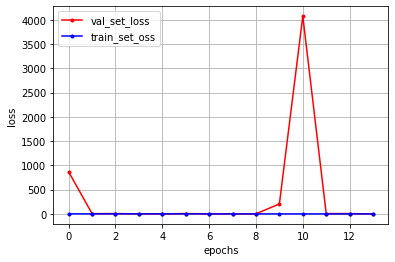

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## test **확인**

In [ ]:
print(classNames[3])

lpadding


In [ ]:
from PIL import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/smallmerge/NoProcessingTestModel.h5')

prediction = model.predict(x_test)
print(prediction[0][4])
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


0.25873092


In [ ]:
cnt = 0
right = 0
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    # tmp = i.sort(reverse=True)
    print(i)
    print(pre_ans)

    if i[0] >= 0.5 :
      print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[0]+"로 추정됩니다.")
      right += 1
    if i[1] >= 0.5:
      print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[1]+"으로 추정됩니다.")
      right += 1
    if i[2] >= 0.5:
      print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[2]+"으로 추정됩니다.")
      right += 1
    if i[3] >= 0.5:
      print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[3]+"으로 추정됩니다.")
      right += 1
    if i[4] >= 0.5:
      print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[4]+"으로 추정됩니다.")
      right += 1
#    if i[5] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[5]+"으로 추정됩니다.")
#    if i[6] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[6]+"으로 추정됩니다.")
    if cnt==150 :
      break;

    cnt += 1
    print("="*40)
print(right)

[0.110 0.141 0.198 0.293 0.259]
3
[0.042 0.068 0.177 0.666 0.047]
3
해당 /content/drive/My Drive/smallmerge/ssleeve/126.png이미지는 hood으로 추정됩니다.
[0.149 0.370 0.349 0.058 0.075]
1
[0.605 0.130 0.228 0.009 0.028]
0
해당 /content/drive/My Drive/smallmerge/ssleeve/112.png이미지는 ssleeve로 추정됩니다.
[0.124 0.216 0.506 0.088 0.065]
2
해당 /content/drive/My Drive/smallmerge/ssleeve/302.png이미지는 lsleeve으로 추정됩니다.
[0.143 0.195 0.520 0.086 0.057]
2
해당 /content/drive/My Drive/smallmerge/ssleeve/303.png이미지는 lsleeve으로 추정됩니다.
[0.870 0.035 0.072 0.002 0.021]
0
해당 /content/drive/My Drive/smallmerge/ssleeve/309.png이미지는 ssleeve로 추정됩니다.
[0.046 0.069 0.206 0.623 0.056]
3
해당 /content/drive/My Drive/smallmerge/ssleeve/268.png이미지는 hood으로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000]
3
해당 /content/drive/My Drive/smallmerge/ssleeve/299.png이미지는 hood으로 추정됩니다.
[0.032 0.873 0.068 0.014 0.013]
1
해당 /content/drive/My Drive/smallmerge/ssleeve/267.png이미지는 nsleeve으로 추정됩니다.
[0.954 0.014 0.021 0.000 0.011]
0
해당 /content/drive/My Drive/smallmerge

In [ ]:
X_train = []
Y_train = []
X_test = []
Y_test = []
fileNames = []

for idx, cat in enumerate(classNames):

    label = [0 for i in range(len(classNames))]
    label[idx] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    for f in range(len(files)):
        img = Image.open(files[f])
        img = img.convert("RGB")
        data = np.asarray(img)
        
        if f >= 420:
            fileNames.append(files[f])
            X_test.append(data)
            Y_test.append(label)
            
        else :
            X_train.append(data)
            Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)


print(X_train)
print(X_train.shape)
print(Y_train.shape)

print("ok", len(X_train))

In [ ]:
from PIL import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model
model = load_model('model.h5')

prediction = model.predict(x_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "ssleeve"
    elif pre_ans == 1: pre_ans_str = "lsleeve"
    elif pre_ans == 2: pre_ans_str = "nsleeve"
    elif pre_ans == 3: pre_ans_str = "collar"
    elif pre_ans == 4: pre_ans_str = "hood"
    elif pre_ans == 5: pre_ans_str = "coat"
    elif pre_ans == 6: pre_ans_str = "jacket"
    elif pre_ans == 7: pre_ans_str = "lpadding"
    elif pre_ans == 8: pre_ans_str = "spadding"
    elif pre_ans == 9: pre_ans_str = "vest"
    elif pre_ans == 10: pre_ans_str = "cardigan"
    elif pre_ans == 11: pre_ans_str = "jsuit"
    elif pre_ans == 12: pre_ans_str = "dress"
    elif pre_ans == 13: pre_ans_str = "spants"
    elif pre_ans == 14: pre_ans_str = "lpants"
    else: pre_ans_str = "skirt"
    if i[0] >= 0.8 : print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[6] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[7] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[8] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[9] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[10] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[11] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[12] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[13] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[14] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[15] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    cnt += 1

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(classNames):

    label = [0 for i in range(len(classNames))]
    label[idx] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    for f in range(len(files)):
        img = Image.open(files[f])
        img = img.convert("RGB")
        data = np.asarray(img)
        
        if f >= 420:
            fileNames.append(files[f])
            x_test.append(data)
            y_test.append(label)
            
        else :
            x_train.append(data)
            y_train.append(label)

# for idx in range(16) :
#     imgDir = dir + '/' + labelNames[idx]
#     files = glob.glob(imgDir+"/*.png")
#     print("파일 길이 : ", len(files))
    
#     for f in files:
#         img = Image.open(f)
#         img = img.convert("RGB")
#         data = np.asarray(img, np.int32)
        
#         label = np.zeros(16)
#         label[idx] = 1
        
#         x.append(data)
#         y.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)


print(x_train)
print(x_train.shape)
print(y_train.shape)

print("ok", len(x_train))

collar  파일 길이 :  450


KeyboardInterrupt: ignored

In [ ]:
from PIL import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model

prediction = model.predict(x_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "ssleeve"
    elif pre_ans == 1: pre_ans_str = "lsleeve"
    elif pre_ans == 2: pre_ans_str = "nsleeve"
    elif pre_ans == 3: pre_ans_str = "collar"
    elif pre_ans == 4: pre_ans_str = "hood"
    elif pre_ans == 5: pre_ans_str = "coat"
    elif pre_ans == 6: pre_ans_str = "jacket"
    elif pre_ans == 7: pre_ans_str = "lpadding"
    elif pre_ans == 8: pre_ans_str = "spadding"
    elif pre_ans == 9: pre_ans_str = "vest"
    elif pre_ans == 10: pre_ans_str = "cardigan"
    elif pre_ans == 11: pre_ans_str = "jsuit"
    elif pre_ans == 12: pre_ans_str = "dress"
    elif pre_ans == 13: pre_ans_str = "spants"
    elif pre_ans == 14: pre_ans_str = "lpants"
    else: pre_ans_str = "skirt"
    if i[0] >= 0.8 : print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[6] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[7] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[8] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[9] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[10] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[11] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[12] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[13] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[14] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[15] >= 0.8: print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    cnt += 1

[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000]
8


NameError: ignored